# COGS 108 - Final Project

## Important

- ONE, and only one, member of your group should upload this notebook to TritonED. 
- Each member of the group will receive the same grade on this assignment. 
- Keep the file name the same: submit the file 'FinalProject.ipynb'.
- Only upload the .ipynb file to TED, do not upload any associted data. Make sure that for cells in which you want graders to see output that these cells have been executed.

## Group Members: Fill in the Student IDs of each group member here

Replace the lines below to list each persons full student ID, ucsd email and full name.

**Yuanhao Zhu** A13626824 yuz587@ucsd.edu

**Jinwei Ren** A92061199 jir017@ucsd.edu

**Yijie Fan** A13485989 yif063@ucsd.edu

**Bolin Yang** A92111272 boy015@ucsd.edu

**Mu He** A13361247 muh005@ucsd.edu  

**Xuan Zhang** A14173638 xuz111@ucsd.edu




## Background Introduction

Housing is an important part of modern life. When people are considering buying a house, the price of the house will impact people’s choice. We want to know **what factors contribute to the sale price of houses**, and therefore help people to make a better choice when they buy a house. 

To get a better understanding of housing price, we did some research on what factors that specialist think will influence the real estate prices. From _The 8 Biggest Factors that Affect Real Estate Prices_ (https://resources.point.com/8-biggest-factors-affect-real-estate-prices/) we know that : **property locations** (proximity and quality of local schools, companies, and shopping centers etc. ), **updates and upgrades** (such as how upgraded the home electronics and indoor decorations are), **Inspection report**, **neighborhood comparable properties** (the recent nearby transaction of properties can influence the price of your properties), and the **appraisal price** are the major factors that can influence the housing price. In addition to the factors listed above, the website called _Homeguru_ (https://www.homeguru.com.au/house-prices) also offers some factors could influence the housing price: **supply and demands of housing**, **potential room numbers**, **parking**, and **local demographics**. 

From the reference above, we have a basic idea of what kind of factors can potentially affect the housing prices. However, the factors mentioned may not contribute significant in real life housing transaction. Therefore, we will explore our own data, and figure out the major factors that influence the housing price in our dataset. 


## Data Description and Privacy/Ethics Considerations
The database we use is allowed for public access. It is a dataset in the famous Google data competition “Kaggle” named “House Prices: Advanced Regression Techniques” that is available for everyone (https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). The dataset contains 2 CSV files, ‘train.csv’ and ‘test.csv’ with 2919 instances and 79 explanatory variables in total. They contain all data fields such as house style, neighborhood, and corresponding house prices.

Although the database we use is completely public, we still have our privacy concerns regarding our datasets. For example, the neighborhood reveals geographic subdivisions smaller than a state. Certainly, we don’t want to reveal information that might disturb the privacy of the owner. So after careful consideration, we have decided to comply with the Safe Harbor Method and anonymized our data. Besides this, the dataset is pretty neutral without potential biases, and no certain population is excluded. Since most of the features in the dataset are tightly related to the house itself (such as house style, roof style, year built), more issues related to data privacy and ethics are unlikely to show up.

## Import necessary libraries

In [56]:
%matplotlib inline
import numpy as np
import pandas as pd
import patsy
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import ttest_ind, chisquare, normaltest, norm
from matplotlib.gridspec import GridSpec

## Preprocess the data

In [57]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_sample = pd.read_csv('submission.csv')

In [58]:
df_sample['SalePrice'] = df_sample['SalePrice'].round(0).astype(int)
df_test['SalePrice'] = df_sample['SalePrice']
df = df_train.append(df_test)
df = df.set_index('Id')

In [59]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900


Now we create a new column called PricePerSquare which denotes the price per area. Since the living area is a factor that determine the toal price of the house, so we devide the sale price by above ground living area (GrLivArea) to get price per square feet. 

In [60]:
df['PricePerSquare'] = df['SalePrice']/df['GrLivArea']

**Data cleaning**: For this part, we dropped columns such as landslope, roofstyle, because those columns are very detail features, not interpretable, or contain too much unspecified values. 

In [61]:
df = df[['YearBuilt', 'Neighborhood', 'SaleType', 'TotalBsmtSF', 'GrLivArea', 'OverallQual', 'OverallCond', 'SalePrice', 'PricePerSquare']]

Then, we want to check if the data for PricePerSquare is normal.

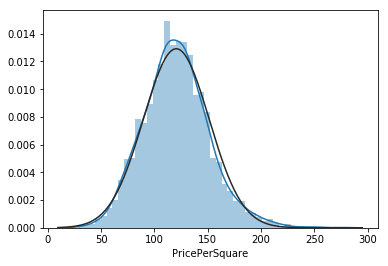

In [62]:
sns.distplot(df['PricePerSquare'], fit=norm);

From the plot we can see data fit into normal distribution really well.

## Part 1 Analysis based on housing quality and price

Our goal here is to analyze whether housing quality has a strong correlation to housing prices. To do so, we use linear regression to plot a graph with housing quality and housing prices.

In [63]:
df_QP = pd.DataFrame()
df_QP['price'] = df['PricePerSquare']
df_QP['quality'] = df['OverallQual'] 
outcome, predictors = patsy.dmatrices('price~quality', df_QP)
mod = sm.OLS(outcome, predictors)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.312
Model:                            OLS   Adj. R-squared:                  0.312
Method:                 Least Squares   F-statistic:                     1325.
Date:                Sun, 17 Mar 2019   Prob (F-statistic):          1.44e-239
Time:                        17:33:20   Log-Likelihood:                -13608.
No. Observations:                2919   AIC:                         2.722e+04
Df Residuals:                    2917   BIC:                         2.723e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.9783      2.102     21.869      0.0

In the result that shown above, R-squared = 0.312, so we can conclude that the relationship between quality and price is not very strong, but still have some weak realtionship. Then we plot out the data to visualize. 

(100, 230)

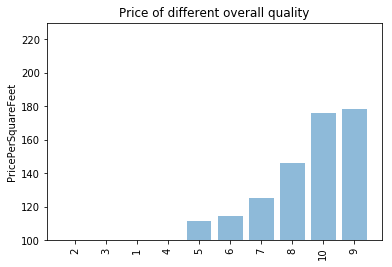

In [64]:
avg = []
x = df['OverallQual'].unique()
for type in df['OverallQual'].unique():
    avg.append(df[df['OverallQual'] == type]['PricePerSquare'].mean())
avg, x = zip(*sorted(zip(avg, x)))
y_pos = np.arange(len(x))
plt.bar(y_pos, avg, align='center', alpha=0.5)
plt.xticks(y_pos,  x, rotation = 90)
plt.ylabel('PricePerSquareFeet')
plt.title('Price of different overall quality')
axes = plt.gca()
axes.set_ylim([100,230])

#### We now show that housing quality has a strong correlation to housing prices. The higher the overall quality the house has, the higher the housing price is.

## Part 2 Analysis based on sale style and price

Our goal here is to analyze which sale style predicts a higher price. To do so, we use linear regression to  plot a graph with sale style and housing prices.

First, we want to know what is the distribution of different sale type in the housing market.

In [65]:
saletype_tbl = df[['SaleType','PricePerSquare']].groupby('SaleType').count()
saletype_tbl

,PricePerSquare
SaleType,
COD,87
CWD,12
Con,5
ConLD,26
ConLI,9
ConLw,8
New,239
Oth,7
WD,2525


<pre>
FIGURE: barplot of price per squarefeet by saletype Descrition of the saletype are provided below:
   WD     Warranty Deed - Conventional
   CWD    Warranty Deed - Cash
   VWD    Warranty Deed - VA(Veterans Affair) Loan
   New    Home just constructed and sold
   COD    Court Officer Deed/Estate
   Con    Contract 15% Down payment regular terms
   ConLw    Contract Low Down payment and low interest
   ConLI    Contract Low Interest
   ConLD    Contract Low Down
   Oth    Other
</pre>

In [66]:
Labels='COD','CWD','Con','ConLD','ConLl','ConLW','New','Oth','WD'
Count='87','12','5','26','9','8','239','7','2525'

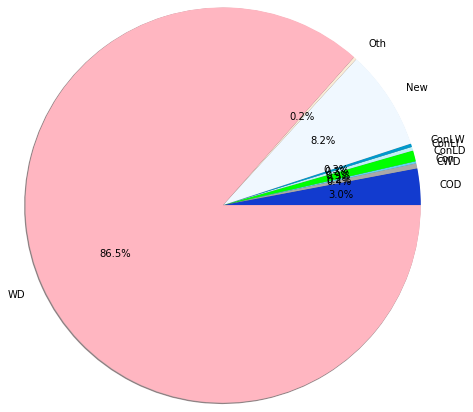

In [67]:
the_grid = GridSpec(2, 2)
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(Count, labels=Labels, autopct='%1.1f%%', shadow=True,
radius = 5, colors=['#123BCF', '#A9A9A9', '#63D1F4', '#00FF00','#C1F0F6', '#0099CC', '#F0F8FF', '#FAEBD7', '#FFB6C1', '#A9A9A9'])
plt.show()

Then, we want to know what is the housing price for each sale type.  

We plot the price per squarefeet by saletype because how the houses were sold has the potential to influence the house price. Here we take the average sale price per square feet in each catagory of saletype, and plot in the bar plot. From the bar plot, different saletype did show different price per square feet. "Contract 15% Down payment regular terms" has the highest average sale price, and COD (Contract 15% Down payment regular terms) has lowest average sale price. 

(100, 160)

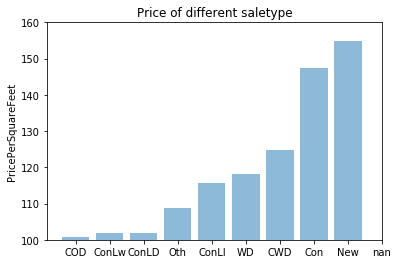

In [68]:
avg = []   
x = df['SaleType'].unique()
for type in df['SaleType'].unique():
    avg.append(df[df['SaleType'] == type]['PricePerSquare'].mean())
avg, x = zip(*sorted(zip(avg, x)))
y_pos = np.arange(len(x))
plt.bar(y_pos, avg, align='center', alpha=0.5)
plt.xticks(y_pos,  x)
plt.ylabel('PricePerSquareFeet')
plt.title('Price of different saletype')
axes = plt.gca()
axes.set_ylim([100,160])

In [69]:
outcome_1, predictors_1 = patsy.dmatrices('PricePerSquare ~ SaleType', df)
mod_1 = sm.OLS(outcome_1, predictors_1)
res_1 = mod_1.fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:         PricePerSquare   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     51.99
Date:                Sun, 17 Mar 2019   Prob (F-statistic):           3.87e-79
Time:                        17:33:20   Log-Likelihood:                -13956.
No. Observations:                2918   AIC:                         2.793e+04
Df Residuals:                    2909   BIC:                         2.798e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           100.8227      3.10

#### We conclude that houses with new sale type will predict higher housing price.

## Part 3 Analysis based on neighborhood and price  
We want to see if different neighborhood will affect their housing price. We will use a histogram to plot the distribution between neighborhood and housing price.

(100, 180)

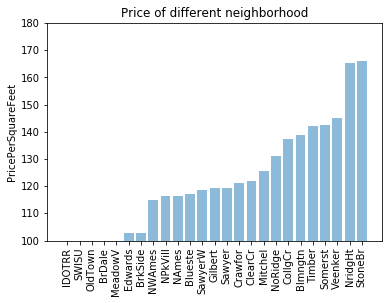

In [70]:
avg = []
x = df['Neighborhood'].unique()
for type in df['Neighborhood'].unique():
    avg.append(df[df['Neighborhood'] == type]['PricePerSquare'].mean())
avg, x = zip(*sorted(zip(avg, x)))
y_pos = np.arange(len(x))
plt.bar(y_pos, avg, align='center', alpha=0.5)
plt.xticks(y_pos,  x, rotation = 90)
plt.ylabel('PricePerSquareFeet')
plt.title('Price of different neighborhood')
axes = plt.gca()
axes.set_ylim([100,180])

## Part 4 Analysis based on YearBuilt and price  
We want to see if different yearbuilt will affect their housing price. We will use a boxplot to plot the distribution between neighborhood and housing price.

/Users/hemu/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


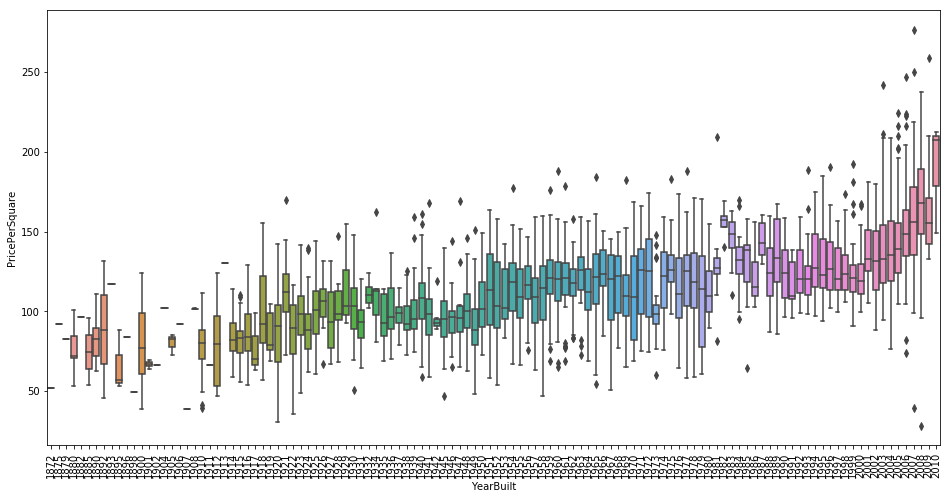

In [71]:
f, ax = plt.subplots(figsize=(16,8))
data = df[['YearBuilt', "PricePerSquare"]]
sns.boxplot(data=data, x="YearBuilt", y="PricePerSquare")
plt.xticks(rotation=90);

#### From the box plot above, we can see that later the house was built, newer the house is, and higher the housing price. 

## Part 5 Analysis based on living area and price  
We want to see if different living area will affect their housing price. We will use a linear regression to plot the correlation between living area and housing price.

In [72]:
#Create linear regression
df_LP = pd.DataFrame()
df_LP['price'] = df['SalePrice']
df_LP['area'] = df['GrLivArea'] 
outcome, predictors = patsy.dmatrices('price~area', df_LP)
mod = sm.OLS(outcome, predictors)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.532
Method:                 Least Squares   F-statistic:                     3317.
Date:                Sun, 17 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:33:22   Log-Likelihood:                -35989.
No. Observations:                2919   AIC:                         7.198e+04
Df Residuals:                    2917   BIC:                         7.199e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7032.3800   3172.140      2.217      0.0

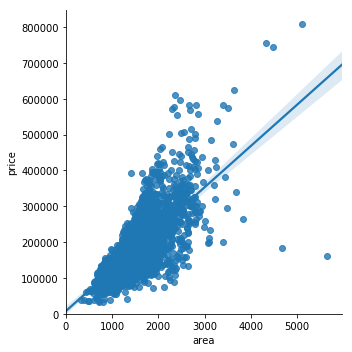

In [73]:
#plot the linear regression graph showing the area price relation
fig=sns.lmplot(x='area',y='price',data=df_LP,fit_reg=True) 
fig.set(xlim=(4, None))
fig.set(ylim=(4,None))
plt.show()

####  Obvious though it is, now we conclude that more general living area means higher overall price. The common sense lies behind the screen is given by Total Price = Total area * PricePerSquare

## Part 6 Analysis based on basement area and price  
We want to see if different basement area will affect their housing price. We will use a linear regression to plot the correlation between basement area and housing price.

In [74]:
#Create linear regression
df_BP = pd.DataFrame()
df_BP['price'] = df['SalePrice']
df_BP['basement'] = df['TotalBsmtSF'] 
outcome, predictors = patsy.dmatrices('price~basement', df_BP)
mod = sm.OLS(outcome, predictors)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.432
Method:                 Least Squares   F-statistic:                     2219.
Date:                Sun, 17 Mar 2019   Prob (F-statistic):               0.00
Time:                        17:33:22   Log-Likelihood:                -36259.
No. Observations:                2918   AIC:                         7.252e+04
Df Residuals:                    2916   BIC:                         7.253e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.464e+04   2889.125     18.913      0.0

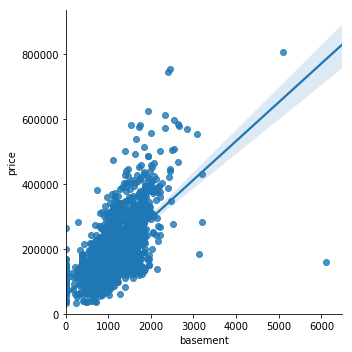

In [78]:
#plot the linear regression graph showing the area price relation
fig=sns.lmplot(x='basement',y='price',data=df_BP,fit_reg=True) 
fig.set(xlim=(4, None))
fig.set(ylim=(4,None))
plt.show()

####  Besides general living area, we find that total basement area also have a positive linear relationship to housing price.

### Part 7 Analysis based on overall condition and price
We already show that housing quality has a strong correlation to housing prices. It is also true that a higher housing condition predicts a higher housing price??

In [76]:
df_CP = pd.DataFrame()
df_CP['price'] = df['PricePerSquare']
df_CP['condition'] = df['OverallCond'] 
outcome, predictors = patsy.dmatrices('price~condition', df_CP)
mod = sm.OLS(outcome, predictors)
result = mod.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     2.247
Date:                Sun, 17 Mar 2019   Prob (F-statistic):              0.134
Time:                        17:33:23   Log-Likelihood:                -14154.
No. Observations:                2919   AIC:                         2.831e+04
Df Residuals:                    2917   BIC:                         2.832e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    116.2628      2.915     39.887      0.0

(100, 230)

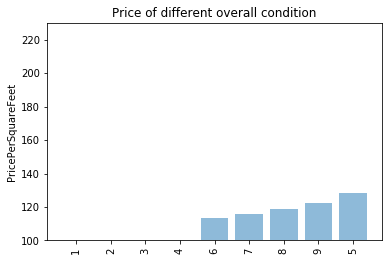

In [77]:
avg = []
x = df['OverallCond'].unique()
for type in df['OverallCond'].unique():
    avg.append(df[df['OverallCond'] == type]['PricePerSquare'].mean())
avg, x = zip(*sorted(zip(avg, x)))
y_pos = np.arange(len(x))
plt.bar(y_pos, avg, align='center', alpha=0.5)
plt.xticks(y_pos,  x, rotation = 90)
plt.ylabel('PricePerSquareFeet')
plt.title('Price of different overall condition')
axes = plt.gca()
axes.set_ylim([100,230])

#### This is beyond our expectation, as we think a higher condition means a higher housing price. However, our data shows that the highest price comes from median overall condition.

### Discussion

After a close inspection of our project, we conclude that our major analyses and hypotheses are correct, i.e., different house styles affect people’s willingness to pay and the higher the overall quality, the higher the housing price is. The major contribution of this project is our model will show users several factors they will need to consider before they look for a house. Construction companies can also benefit from our analyses since they could spend money improving factors that customers value the most and less on factors that are costly but inessential.  

However, if it seems that we are unable to determine factors that largely influence the house prices, we would look for do some research to see some other possible factors.Then we will try to find datasets that we could use to check whether or not those new factors contribute greatly to the house prices. In fact, determining housing prices is difficult since it needs to take plenty of factors into consideration, and thus there are still many more factors affecting housing prices that are not included in our analyses. Besides, there are potential pitfalls of our data: first, the dataset only contains 2919 variables. As a result, we don’t have enough instances of the house for our analysis. Second, the dataset doesn’t scale outside the city of Ames, Iowa. As a result, we restrict our analysis and may subject to bias. In conclusion, although the dataset provides buyer some insight about the housing price, it is still far from enough to find a full-fledged housing formula for house buyers.

### Final Conclusion

Our analysis shows that various factors could have influenced the housing price, mainly by its overall quality, general living area, total basement area, and year built.

First, we find that the higher **overall quality** the house have, the higher the housing price is going to be.

Next, Related to the **sale type** of a house. We find out that new house is more preferred, and they reflects a higher price.

Then, there is a strong positive association between **living area** and the overall price of a house. Analysis of data shows that, the more living area the house have, the higher the housing price is. This is fairly obvious, as more living area usually means more production cost, more material, and more landarea. Those factors will be counted when the house is sold, which should increase the price. Moreover, we also find there is a strong positive correlation between **basement area** and the overall price of a house. A general anaylysis on the data shows that more basement area also counts in living area, which pushes the housing price to a higher range.

On the other hand, when we take the year when the houses are built into consideration. We find a positive correlation between **year built** and house price. For example, the houses built in 2010 is average 200 dollars per square, which is over 125 dollars more expensive than their counter part in 1900s. This gives us the conclusion that the later the house was built, newer the house is, and higher the housing price.

Last but not the least, things we thought to have a strong influence in the housing price like the overall condition of the house, don't prove to have significant correlation with the price of the house. Specifically, the high condition houses only predict a median housing price, while, the median condition houses are more preferred. 

In conclusion, many factors can influence the housing price. From our analysis, house seeker has gotten a general view on how the price of the house is determined. Certainly, more analysis is needed to be done on larger population, to find out what are the factors to housing price out of certain area, and certain house seekers.
There are also some missing variables we have not included in our consideration. For example, people's average age
is not considered. Just think about youngsters should prefer newer houses than elders, which reflects the different preference in two types of houses. However, no matter these factors are omitted or not, those accurate and useful information we provided from the public datasets of housing price may change people's opinion when they decide to get a house.